# Importing  libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import skew

# Load the dataset

In [2]:
df = pd.DataFrame(np.round(pd.read_csv("our project data.csv")))
l=df
df.rename(columns ={'price': 'SalePrice'}, inplace =True)
df.head()

,id,date,SalePrice,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,48.0,-122.0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,48.0,-122.0,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,48.0,-122.0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,48.0,-122.0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,48.0,-122.0,1800,7503


# Checking the columns in the dataset

In [3]:
df.columns

Index(['id', 'date', 'SalePrice', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
y=pd.DataFrame(df["SalePrice"])

y.shape

In [5]:
df=df.drop(['id', 'date', 'SalePrice'],axis=1)

In [6]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,48.0,-122.0,1340,5650
1,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,48.0,-122.0,1690,7639
2,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,48.0,-122.0,2720,8062
3,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,48.0,-122.0,1360,5000
4,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,48.0,-122.0,1800,7503


# Univariate Analysis 

Histogram: The saleprice has appreciable positive skewness,
deviates from the normal distribution and
shows peakedness.
Let's take a look at the skewness and kurtosis in numbers:

This is quite significant. At the data standardisation section, we will fix this. 

# 2. Feature exploration 

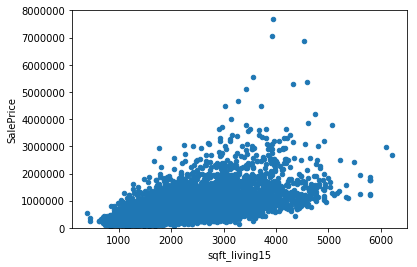

In [7]:
var = 'sqft_living15'
data = pd.concat([y['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(3,8000000))
plt.savefig('sqft_living15 vs SalePrice .png')

There's clearly a linear relationship with a significant portion of outliers. 

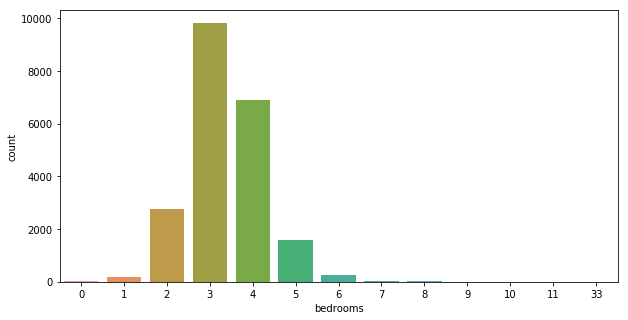

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(10,5))
sns.countplot( df['bedrooms'])
plt.show()
plt.savefig("bedroom.png")

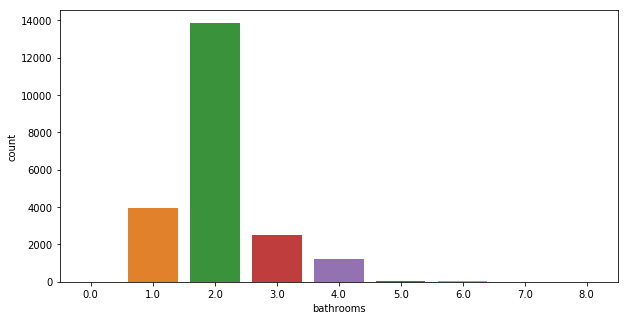

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(df['bathrooms'])
plt.show()

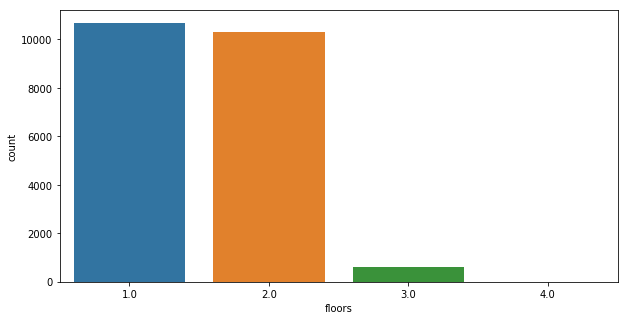

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(df['floors'])
plt.show()

# Bivariate Analysis

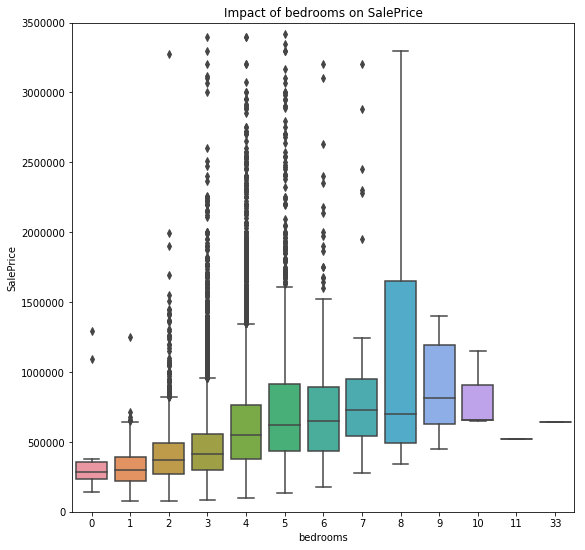

In [11]:
var = 'bedrooms'
data = pd.concat([y, df[var]], axis=1)
f, ax = plt.subplots(figsize=(9, 9))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.title("Impact of bedrooms on SalePrice")
fig.axis(ymin=0, ymax=3500000);

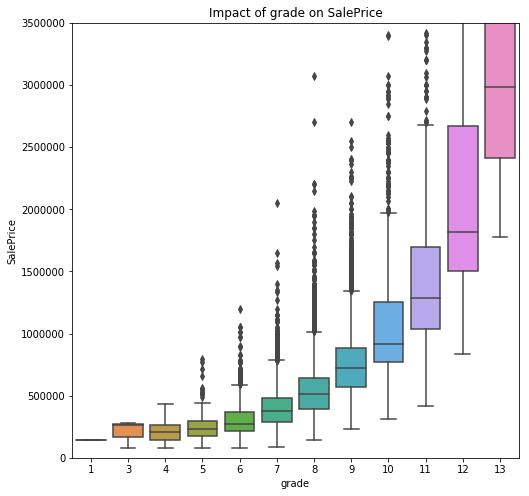

In [12]:
var = 'grade'
data = pd.concat([y, df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.title('Impact of grade on SalePrice')
fig.axis(ymin=0, ymax=3500000);

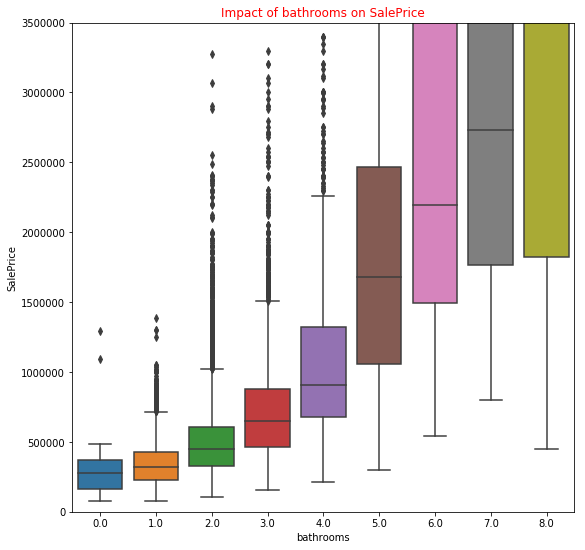

In [13]:
var = 'bathrooms'
data = pd.concat([y['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(9, 9))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.title('Impact of bathrooms on SalePrice', color = 'red')
fig.axis(ymin=0, ymax=3500000);

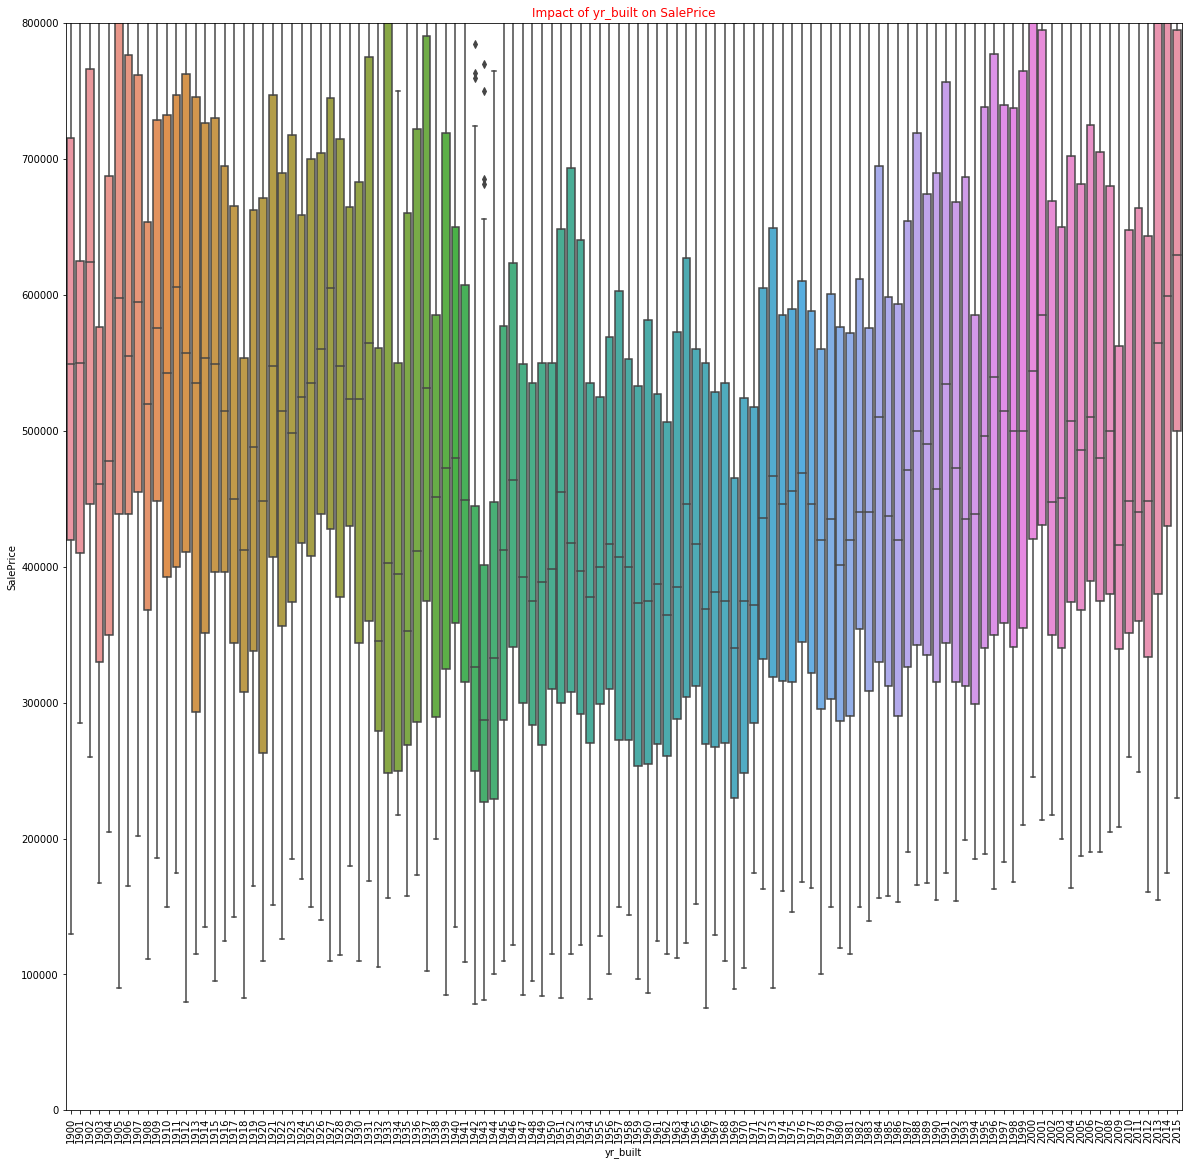

In [14]:
var = 'yr_built'
data = pd.concat([y['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.title('Impact of yr_built on SalePrice', color = 'red')
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
plt.show()

# Time series Analysis

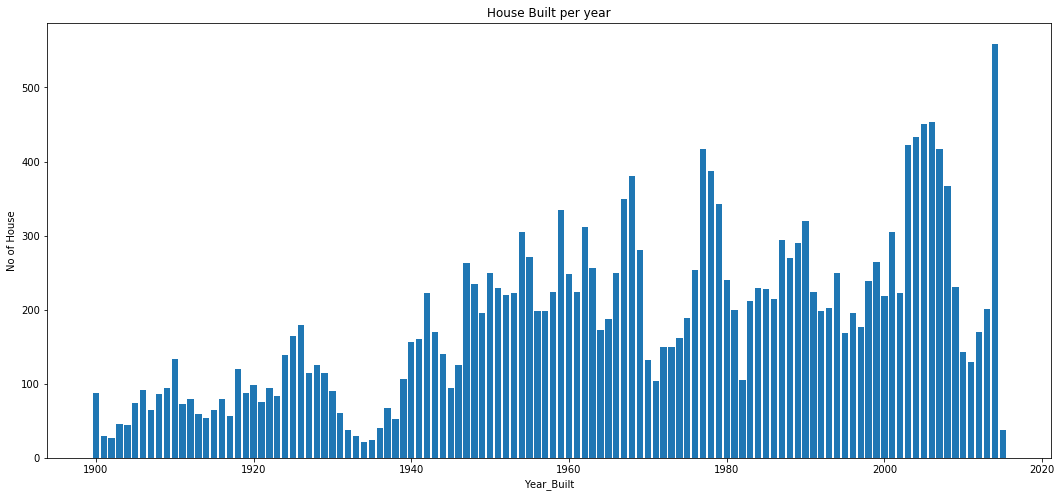

In [15]:
data = l['yr_built'].value_counts().reset_index(name='yrbuilt')
data.columns = ['yr_built', 'Count']
plt.figure(figsize=(18,8))
c = plt.bar(data["yr_built"], data["Count"],align='center')
plt.title('House Built per year')
plt.xlabel('Year_Built')
plt.ylabel('No of House')
plt.show()

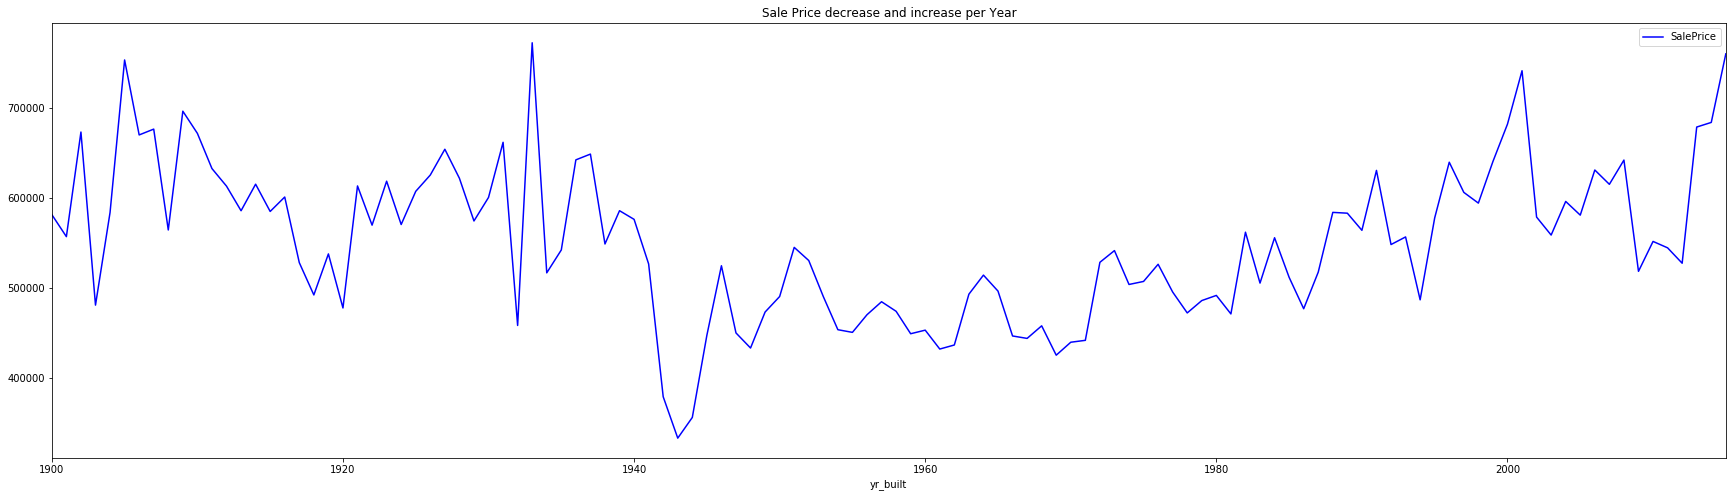

In [16]:
data1 = l[['yr_built', 'SalePrice']].groupby(['yr_built'], as_index=True).mean().plot(figsize=(30,8),color = 'blue')
plt.title('Sale Price decrease and increase per Year')
plt.show()
time =data1.get_figure()
time.savefig('Time.png')

In [17]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,48.0,-122.0,1340,5650
1,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,48.0,-122.0,1690,7639
2,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,48.0,-122.0,2720,8062
3,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,48.0,-122.0,1360,5000
4,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,48.0,-122.0,1800,7503


In [18]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1,0.49,0.58,0.032,0.18,-0.0066,0.08,0.028,0.36,0.48,0.3,0.15,0.019,-0.15,-0.00074,-0.0082,0.39,0.029
bathrooms,0.49,1,0.7,0.09,0.33,0.065,0.2,-0.067,0.59,0.6,0.33,0.38,0.069,-0.14,0.088,-0.006,0.5,0.087
sqft_living,0.58,0.7,1,0.17,0.32,0.1,0.28,-0.059,0.76,0.88,0.44,0.32,0.055,-0.2,0.09,-0.0093,0.76,0.18
sqft_lot,0.032,0.09,0.17,1,-0.0019,0.022,0.075,-0.009,0.11,0.18,0.015,0.053,0.0076,-0.13,-0.1,-0.057,0.14,0.72
floors,0.18,0.33,0.32,-0.0019,1,0.026,0.028,-0.22,0.41,0.49,-0.25,0.38,0.015,-0.023,0.11,0.018,0.24,-0.011
waterfront,-0.0066,0.065,0.1,0.022,0.026,1,0.4,0.017,0.083,0.072,0.081,-0.026,0.093,0.03,-0.0095,-0.08,0.086,0.031
view,0.08,0.2,0.28,0.075,0.028,0.4,1,0.046,0.25,0.17,0.28,-0.053,0.1,0.085,0.059,-0.022,0.28,0.073
condition,0.028,-0.067,-0.059,-0.009,-0.22,0.017,0.046,1,-0.14,-0.16,0.17,-0.36,-0.061,0.003,-0.0091,-0.013,-0.093,-0.0034
grade,0.36,0.59,0.76,0.11,0.41,0.083,0.25,-0.14,1,0.76,0.17,0.45,0.014,-0.18,0.17,-0.0082,0.71,0.12
sqft_above,0.48,0.6,0.88,0.18,0.49,0.072,0.17,-0.16,0.76,1,-0.052,0.42,0.023,-0.26,0.029,-0.0076,0.73,0.19


# High corelated above 0.6¶

In [19]:
s = corr.unstack()
s[(abs(s)>0.6)&(abs(s)<1)]

bathrooms      sqft_living      0.701784
sqft_living    bathrooms        0.701784
               grade            0.762704
               sqft_above       0.876597
               sqft_living15    0.756420
sqft_lot       sqft_lot15       0.718557
grade          sqft_living      0.762704
               sqft_above       0.755923
               sqft_living15    0.713202
sqft_above     sqft_living      0.876597
               grade            0.755923
               sqft_living15    0.731870
sqft_living15  sqft_living      0.756420
               grade            0.713202
               sqft_above       0.731870
sqft_lot15     sqft_lot         0.718557
dtype: float64

# Standardization of data

In [20]:
#standardizing data to mitigate skewdness and kurtosis
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(l['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.26686039]
 [-1.25868864]
 [-1.25324081]
 [-1.2505169 ]
 [-1.24779298]
 [-1.24643103]
 [-1.24506907]
 [-1.24234515]
 [-1.23962124]
 [-1.23962124]]

outer range (high) of the distribution:
[[10.75649871]
 [10.78646177]
 [11.24407943]
 [12.45022882]
 [12.96559346]
 [13.10178919]
 [13.70105041]
 [17.28299812]
 [17.76649297]
 [19.50298853]]


# Normalising the Saleprice and sqft_living 

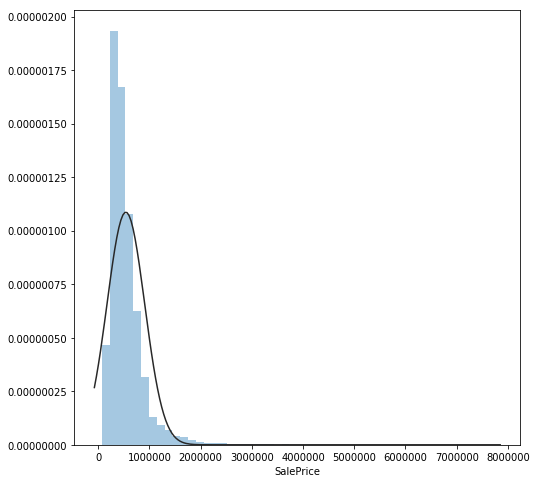

<Figure size 432x288 with 0 Axes>

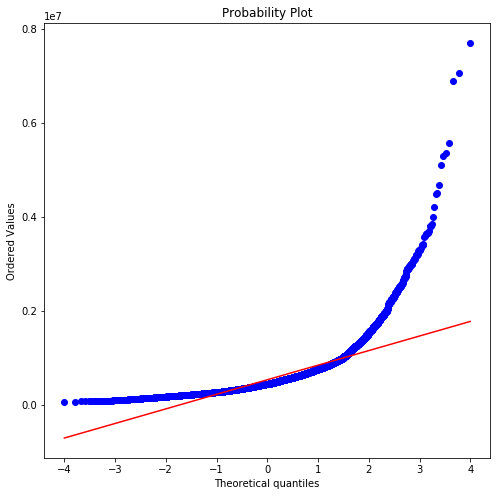

In [21]:
from scipy.stats import norm
from scipy import stats
f, ax = plt.subplots(figsize=(8,8))
sns.distplot(y['SalePrice'], fit=norm, bins=50, kde=False);
fig = plt.figure()
f, ax = plt.subplots(figsize=(8, 8))
res = stats.probplot(y['SalePrice'], plot=plt)
plt.show()
%matplotlib inline

# Fitting the normal distribution curve

# Applying log transformation

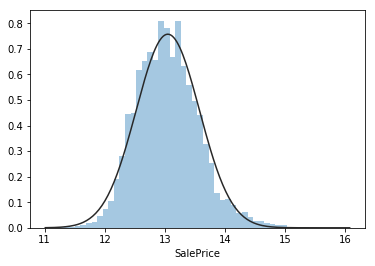

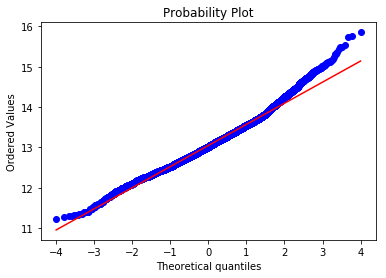

In [22]:
y['SalePrice'] = np.log(y['SalePrice'])
sns.distplot(y['SalePrice'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(y['SalePrice'], plot=plt)

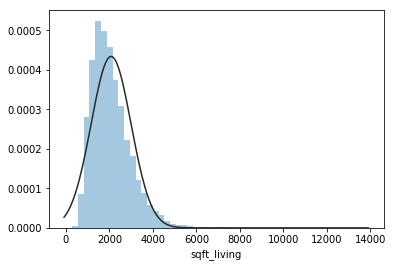

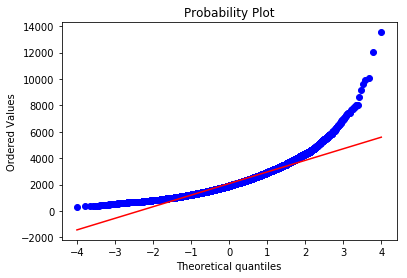

In [23]:
#histogram and normal probability plot
sns.distplot(df['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['sqft_living'], plot=plt)

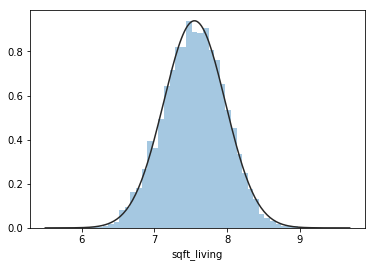

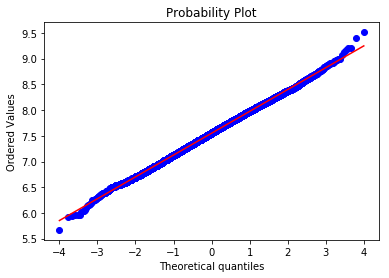

In [24]:
df['sqft_living'] = np.log(df['sqft_living'])
#transformed histogram and normal probability plot
sns.distplot(df['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['sqft_living'], plot=plt)

# Scatter plot

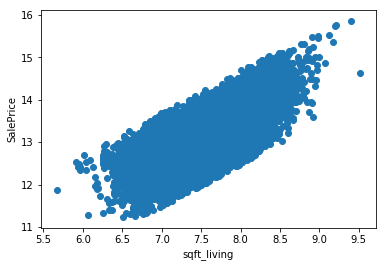

In [25]:
plt.scatter(df['sqft_living'], y['SalePrice']);
plt.xlabel('sqft_living')
plt.ylabel('SalePrice')
plt.show()

#### There is a nice linear relationship between the features 

## 4. Fitting Machine Learning Models

In [26]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.0,7.073270,5650,1.0,0,0,3,7,1180,0,1955,0,98178,48.0,-122.0,1340,5650
1,3,2.0,7.851661,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,48.0,-122.0,1690,7639
2,2,1.0,6.646391,10000,1.0,0,0,3,6,770,0,1933,0,98028,48.0,-122.0,2720,8062
3,4,3.0,7.580700,5000,1.0,0,0,5,7,1050,910,1965,0,98136,48.0,-122.0,1360,5000
4,3,2.0,7.426549,8080,1.0,0,0,3,8,1680,0,1987,0,98074,48.0,-122.0,1800,7503


In [27]:
s = corr.unstack()
s[(abs(s)>0.6)&(abs(s)<1)]

bathrooms      sqft_living      0.701784
sqft_living    bathrooms        0.701784
               grade            0.762704
               sqft_above       0.876597
               sqft_living15    0.756420
sqft_lot       sqft_lot15       0.718557
grade          sqft_living      0.762704
               sqft_above       0.755923
               sqft_living15    0.713202
sqft_above     sqft_living      0.876597
               grade            0.755923
               sqft_living15    0.731870
sqft_living15  sqft_living      0.756420
               grade            0.713202
               sqft_above       0.731870
sqft_lot15     sqft_lot         0.718557
dtype: float64

'sqft_lot15','grade','zipcode', 'lat', 'long'

In [28]:
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated','sqft_lot15','grade','zipcode', 'lat', 'long',
       'sqft_living15']
X=df[feature_cols]

In [29]:
X.shape

(21613, 18)

In [30]:
y.head()

,SalePrice
0,12.309982
1,13.195614
2,12.100712
3,13.311329
4,13.142166


# Method1 LinearRegression

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.20,random_state=0)
#X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=0)

In [32]:
x_train.shape,y_train.shape

((17290, 18), (17290, 1))

In [33]:
from sklearn.metrics import explained_variance_score

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
def eroor_and_score(pre_y,y_test):
    a = []
    
    b = "R-Square result: %.2f" %r2_score(pre_y,y_test)
    c = "explined variance of model: %.2f" %explained_variance_score(pre_y,y_test,multioutput='uniform_average') 
    d = "mean_squared_error:  %.2f"%mean_squared_error(pre_y,y_test)
    e = "RMSE:  %.2f"%np.sqrt(mean_squared_error(pre_y,y_test))
    a.append(b)
    a.append(c)
    a.append(d)
    a.append(e)
    return a

In [36]:
predcted_y_test =regressor.predict(x_test)
predcted_y_train =regressor.predict(x_train)

In [37]:
print("Simple regression on test set :",eroor_and_score(predcted_y_test,y_test))
print("Simple regression on train set :",eroor_and_score(predcted_y_train,y_train))


Simple regression on test set : ['R-Square result: 0.73', 'explined variance of model: 0.73', 'mean_squared_error:  0.06', 'RMSE:  0.24']
Simple regression on train set : ['R-Square result: 0.73', 'explined variance of model: 0.73', 'mean_squared_error:  0.06', 'RMSE:  0.25']


In [38]:
print( " Test accuracy  %.2f " %regressor.score(x_test, y_test))

 Test accuracy  0.78 


# model accuracy

In [39]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(regressor, X, y,cv =10 )
Accuracy = score.mean()
print("Linear model acuuracy: {}%". format(int(round(Accuracy*100))))

Linear model acuuracy: 78%


# Method2: Ridge Regression

In [40]:
from sklearn.linear_model import Ridge
#alpha = [0.1,0.01,0.02,0.001,0.001,0.0001,0.00001,0.0001]
RidgeReg = Ridge(0.001,max_iter=1000)
RidgeReg.fit(x_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
predcted_y_test =RidgeReg.predict(x_test)
predcted_y_train =RidgeReg.predict(x_train)
print("Simple regression on test set :",eroor_and_score(predcted_y_test,y_test))
print("Simple regression on train set :",eroor_and_score(predcted_y_train,y_train))


Simple regression on test set : ['R-Square result: 0.73', 'explined variance of model: 0.73', 'mean_squared_error:  0.06', 'RMSE:  0.24']
Simple regression on train set : ['R-Square result: 0.73', 'explined variance of model: 0.73', 'mean_squared_error:  0.06', 'RMSE:  0.25']


In [42]:
print( " Test accuracy  %.2f " %RidgeReg.score(x_test, y_test))

 Test accuracy  0.78 


# Model accuracy

In [43]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RidgeReg, X, y,cv =10 )
Accuracy = score.mean()
print("Ridge model acuuracy: {}%". format(int(round(Accuracy*100))))

Ridge model acuuracy: 78%


# Method3: Lasso Regression

In [44]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.001,max_iter=1000)
lassoReg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
predcted_y_test =lassoReg.predict(x_test)
predcted_y_train =lassoReg.predict(x_train)
print("lasso regression on test set :",eroor_and_score(predcted_y_test,y_test))
print("lasso regression on train set :",eroor_and_score(predcted_y_train,y_train))

lasso regression on test set : ['R-Square result: 0.72', 'explined variance of model: 0.72', 'mean_squared_error:  0.06', 'RMSE:  0.24']
lasso regression on train set : ['R-Square result: 0.72', 'explined variance of model: 0.72', 'mean_squared_error:  0.06', 'RMSE:  0.25']


In [46]:
print( " Test accuracy  %.2f " %lassoReg.score(x_test, y_test))

 Test accuracy  0.78 


# cross check

In [47]:
score = cross_val_score(lassoReg, X, y,cv =10 )
Accuracy = score.mean()
print("lasso acuuracy: {}%". format(int(round(Accuracy*100))))

lasso acuuracy: 78%


# Method4: Elastic Net

In [77]:
from sklearn.linear_model import ElasticNet 
ElasticNetReg = ElasticNet(alpha=0.01,max_iter=10000)
ElasticNetReg.fit(x_train, y_train)


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [78]:
predcted_y_test =ElasticNetReg.predict(x_test)
predcted_y_train =ElasticNetReg.predict(x_train)
print("Elastic regression on test set :",eroor_and_score(predcted_y_test,y_test))
print("Elastic regression on train set :",eroor_and_score(predcted_y_train,y_train))


Elastic regression on test set : ['R-Square result: 0.71', 'explined variance of model: 0.71', 'mean_squared_error:  0.06', 'RMSE:  0.24']
Elastic regression on train set : ['R-Square result: 0.70', 'explined variance of model: 0.70', 'mean_squared_error:  0.06', 'RMSE:  0.25']


In [79]:
print( " Test  accuracy  %.2f " %ElasticNetReg.score(x_test, y_test))

 Test  accuracy  0.78 


In [80]:
score = cross_val_score(ElasticNetReg, X, y,cv =10 )
Accuracy = score.mean()
print("Ridge model acuuracy: {}%". format(int(round(Accuracy*100))))

Ridge model acuuracy: 77%


# Method5: Polynomial

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
predcted_y_test = lin_reg_2.predict(poly_reg.fit_transform(x_test))
predcted_y_train =lin_reg_2.predict(poly_reg.fit_transform(x_train))
print("Polynomial regression on test set :",eroor_and_score(predcted_y_test,y_test))
print("Polynomial regression on train set :",eroor_and_score(predcted_y_train,y_train))

Polynomial regression on test set : ['R-Square result: 0.77', 'explined variance of model: 0.77', 'mean_squared_error:  0.05', 'RMSE:  0.23']
Polynomial regression on train set : ['R-Square result: 0.77', 'explined variance of model: 0.77', 'mean_squared_error:  0.05', 'RMSE:  0.23']


# model accuracy

In [54]:
score = cross_val_score(lin_reg_2, X, y,cv =10 )
Accuracy = score.mean()
print("Polynomial  model acuuracy: {}%". format(int(round(Accuracy*100))))

Polynomial  model acuuracy: 78%


# Decission Tree regression

In [55]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
dec_tree = regressor.fit(x_train, y_train)


In [56]:
predcted_y_test =dec_tree.predict(x_test)
predcted_y_train =dec_tree.predict(x_train)
print("Decision Tree regression on test set :",eroor_and_score(predcted_y_test,y_test))
print("Decision Tree regression on train set :",eroor_and_score(predcted_y_train,y_train))

Decision Tree regression on test set : ['R-Square result: 0.72', 'explined variance of model: 0.72', 'mean_squared_error:  0.08', 'RMSE:  0.28']
Decision Tree regression on train set : ['R-Square result: 1.00', 'explined variance of model: 1.00', 'mean_squared_error:  0.00', 'RMSE:  0.03']


In [57]:
print( " Decision Tree   %.2f " %dec_tree.score(x_test, y_test))

 Decision Tree   0.71 


In [58]:
score = cross_val_score(dec_tree, X, y,cv =10 )
Accuracy = score.mean()
print("Ridge model acuuracy: {}%". format(int(round(Accuracy*100))))

Ridge model acuuracy: 71%


In [59]:
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.ensemble import RandomForestRegressor

In [60]:
depth = [2,4,6,10]
features = [5,8,11,14]


In [64]:
My_output = []
for i in features:
    for k in depth:
        regr = RandomForestRegressor(random_state=10,max_features=i,max_depth=k,
                              n_estimators=100,n_jobs=2)
        regr.fit(x_train, y_train)
        score = regr.score(x_train, y_train )
        My_output.append((score,k,i))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

In [65]:
predcted_y_test =regr.predict(x_test)
predcted_y_train =regr.predict(x_train)
print("Random Forest regression on test set :",eroor_and_score(predcted_y_test,y_test))
print("Random Forest regression on train set :",eroor_and_score(predcted_y_train,y_train))


Random Forest regression on test set : ['R-Square result: 0.79', 'explined variance of model: 0.79', 'mean_squared_error:  0.05', 'RMSE:  0.21']
Random Forest regression on train set : ['R-Square result: 0.86', 'explined variance of model: 0.86', 'mean_squared_error:  0.03', 'RMSE:  0.18']


In [66]:
print( " Test  accuracy  %.2f " %regr.score(x_test, y_test))


 Test  accuracy  0.83 


# full model accuracy

In [68]:
score = cross_val_score(regr, X, y,cv =10 )
Accuracy = score.mean()

print("Random Forest model acuuracy: {}%". format(int(round(Accuracy*100))))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

Random Forest model acuuracy: 83%


In [69]:
from sklearn import ensemble
GBR=ensemble.GradientBoostingRegressor(n_estimators=400,max_depth=5,min_samples_split=2,learning_rate=0.1)

In [70]:
GBR.fit(x_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [71]:
GBR.score(x_test,y_test)

0.8864091339139586

In [72]:
predcted_y_test =GBR.predict(x_test)
predcted_y_train =GBR.predict(x_train)
print("Random Forest regression on test set :",eroor_and_score(predcted_y_test,y_test))
print("Random Forest regression on train set :",eroor_and_score(predcted_y_train,y_train))


Random Forest regression on test set : ['R-Square result: 0.87', 'explined variance of model: 0.87', 'mean_squared_error:  0.03', 'RMSE:  0.17']
Random Forest regression on train set : ['R-Square result: 0.93', 'explined variance of model: 0.93', 'mean_squared_error:  0.02', 'RMSE:  0.13']


In [73]:
GBR.score(x_train,y_train)

0.9382409852686675

In [75]:
score = cross_val_score(GBR, X, y,cv =10 )
Accuracy = score.mean()

print("GBR: {}%". format(int(round(Accuracy*100))))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

GBR: 88%
